In [1]:
import sys
print(sys.version)

3.6.5 |Anaconda custom (64-bit)| (default, Mar 29 2018, 13:14:23) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
matplotlib.rcParams.update({'font.size': 6})
%config InlineBackend.rc = {}
rcParams["savefig.dpi"] = 300
rcParams["figure.dpi"] = 300

#from celerite import plot_setup
#plot_setup.setup()

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [3]:
%%javascript
try {
  require(['base/js/utils'], function (utils) {
    utils.load_extension('code_prettify/code_prettify');
    utils.load_extension('collapsible_headings/main'); 
    utils.load_extension('codefolding/edit'); 
    utils.load_extension('codefolding/main'); 
    utils.load_extension('execute_time/ExecuteTime');   
    utils.load_extension('toc2/main'); 
  });
}
catch (err) {
  console.log('toc2 load error:', err);
}

<IPython.core.display.Javascript object>

In [4]:
# make notebook nice and wide to fill the entire screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
import numpy as np
from tqdm import tqdm

In [6]:
def bootstrap_resample(X, n=None):
    """! Returns bootstrap resample of an array
    taken from http://fab.cba.mit.edu/classes/864.14/students/Royall_Emily/svdmatrix.py
    
    @param[in] X         array to resample
    @param[in]           length of resampled array, equal to length of input array if left at None
    """
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = X[resample_i]
    return X_resample

In [7]:
f = open("/Users/nevencaplar/Documents/Variability/Lia_Data/Sandro/run_script_ex_Sandro.sh", "r")
run_script_ex=f.read()

In [8]:
# which t_bin we want
# 0.1 Myr

tbin_in=3600*24*365*10**5
print(tbin_in)

# how long we go
# we want to have enough points for 10 Gyr
(10*10**9)/(0.1*10**6)
# that is 10**5 points
# in units of 2 
2**17
# we bump it up to 2**20

# inverse frequency of 10 Myr
1/(3600*24*365*10**7)

3153600000000


3.1709791983764586e-15

In [9]:
1/(3600*24*365*500*10**6)

6.341958396752918e-17

In [22]:
f = open("/Users/nevencaplar/Documents/Variability/Lia_Data/Sandro/run_script_ex_Sandro.sh", "r")
run_script_ex=f.read()

alpha_low_values=[0,1,2,3,4]
alpha_high_values=[0,1,2,3,4]
#  50 Myr, 100 Myr,500 Myr, 1000 Myr, 5000 Myr, 10000 Myr
v_bend_values=[6.34e-16,3.171e-16,6.34e-17,3.171e-17,6.34e-18,3.171e-18]

for alpha_low_in in range(len(alpha_low_values)):
    for alpha_high_in in range(len(alpha_high_values)):
        for v_bend_in in range(len(v_bend_values)):
            if alpha_low_in>alpha_high_in:
                pass
            else:
                run_script_ex_changed=run_script_ex.replace("a_high_in=2.0", "a_high_in="+str(alpha_high_values[alpha_high_in]))
                run_script_ex_changed=run_script_ex_changed.replace("a_low_in=0.0", "a_low_in="+str(alpha_low_values[alpha_low_in]))                
                run_script_ex_changed=run_script_ex_changed.replace("Sandro", "Sandro_al_"+str(alpha_low_in)+"_ah_"+str(alpha_high_in)+'_v_'+str(v_bend_in))
                run_script_ex_changed=run_script_ex_changed.replace("v_bend_in=3.171e-15", "v_bend_in="+str(v_bend_values[v_bend_in]))

                f = open('/Users/nevencaplar/Documents/Variability/Lia_Data/Sandro/run_script_ex_al_'+str(alpha_low_in)+'_ah_'+str(alpha_high_in)+'_v_'+str(v_bend_in)+'.sh','w')
                f.write(run_script_ex_changed)
                f.close()
    

In [23]:
outF = open("/Users/nevencaplar/Documents/Variability/Lia_Data/Sandro/submit_Sandro_script.sh", "w")
outF.write('#!/bin/bash ')
outF.write("\n")

for alpha_low_in in range(len(alpha_low_values)):
    for alpha_high_in in range(len(alpha_high_values)):
        for v_bend_in in range(len(v_bend_values)):
            if alpha_low_in>alpha_high_in:
                pass
            else:
                outF.write('sh /home/ncaplar/CodeGpu/Scripts/run_script_ex_al_'+str(alpha_low_in)+'_ah_'+str(alpha_high_in)+'_v_'+str(v_bend_in)+'.sh')
                outF.write("\n")
outF.close()

In [82]:
#!/bin/bash 

'#!/bin/bash\n\n\n# initialise\n#export LD_LIBRARY_PATH=/usr/local/cuda-9.0/lib64\n\nexport LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/home/ncaplar/.conda/envs/cuda_env/lib\nexport LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/home/ncaplar/CodeGpu/software/lib\n\n\ndirpath="/tigress/ncaplar/GpuData/" \n\necho $LD_LIBRARY_PATH\n\n# GPU\ngpu_name=0\n\n#general inputs\nname="Sandro"\nrepetitions=10\n\n#codes inputs\nLClength_in=20\ntbin_in= 3153600000000.\n#-------------\nA_in=30\nv_bend_in=3.171e-15\na_low_in=0.0\na_high_in=4\nc_in=0.0\n#-------------\nnum_it_in=200\nLowerLimit_in=0.00001\nUpperLimit_in=10.\nLowerLimit_acc_in=0.00017\nUpperLimit_acc_in=3.16\n#-------------\nlambda_s_LN_in=1\nsigma_LN_in=0.3\n#-------------\ndelta1_BPL_in=0.47\ndelta2_BPL_in=2.53\nlambda_s_BPL_in=0.11\n#-------------\nPDF_in=0\n#-------------\nlen_block_rd_in=1024\n\nfor rep in `seq 1 $repetitions`; do\n\n# Create unique results directory for each run\nname_file_in=/tigress/ncaplar/GpuData/results_${name}_${rep}.bin\necho "re

In [81]:
run_script_ex

'#!/bin/bash\n\n\n# initialise\n#export LD_LIBRARY_PATH=/usr/local/cuda-9.0/lib64\n\nexport LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/home/ncaplar/.conda/envs/cuda_env/lib\nexport LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/home/ncaplar/CodeGpu/software/lib\n\n\ndirpath="/tigress/ncaplar/GpuData/" \n\necho $LD_LIBRARY_PATH\n\n# GPU\ngpu_name=0\n\n#general inputs\nname="Sandro"\nrepetitions=10\n\n#codes inputs\nLClength_in=20\ntbin_in= 3153600000000.\n#-------------\nA_in=30\nv_bend_in=3.171e-15\na_low_in=0.0\na_high_in=2.0\nc_in=0.0\n#-------------\nnum_it_in=200\nLowerLimit_in=0.00001\nUpperLimit_in=10.\nLowerLimit_acc_in=0.00017\nUpperLimit_acc_in=3.16\n#-------------\nlambda_s_LN_in=1\nsigma_LN_in=0.3\n#-------------\ndelta1_BPL_in=0.47\ndelta2_BPL_in=2.53\nlambda_s_BPL_in=0.11\n#-------------\nPDF_in=0\n#-------------\nlen_block_rd_in=1024\n\nfor rep in `seq 1 $repetitions`; do\n\n# Create unique results directory for each run\nname_file_in=/tigress/ncaplar/GpuData/results_${name}_${rep}.bin\necho "

In [31]:
import numpy as np
ER_curve = np.zeros(2*22, dtype = float)
ER_curve = np.fromfile('/Users/nevencaplar/Documents/Variability/Lia_Data/Sandro/test/results_Sandro_test_12.bin', dtype = float)

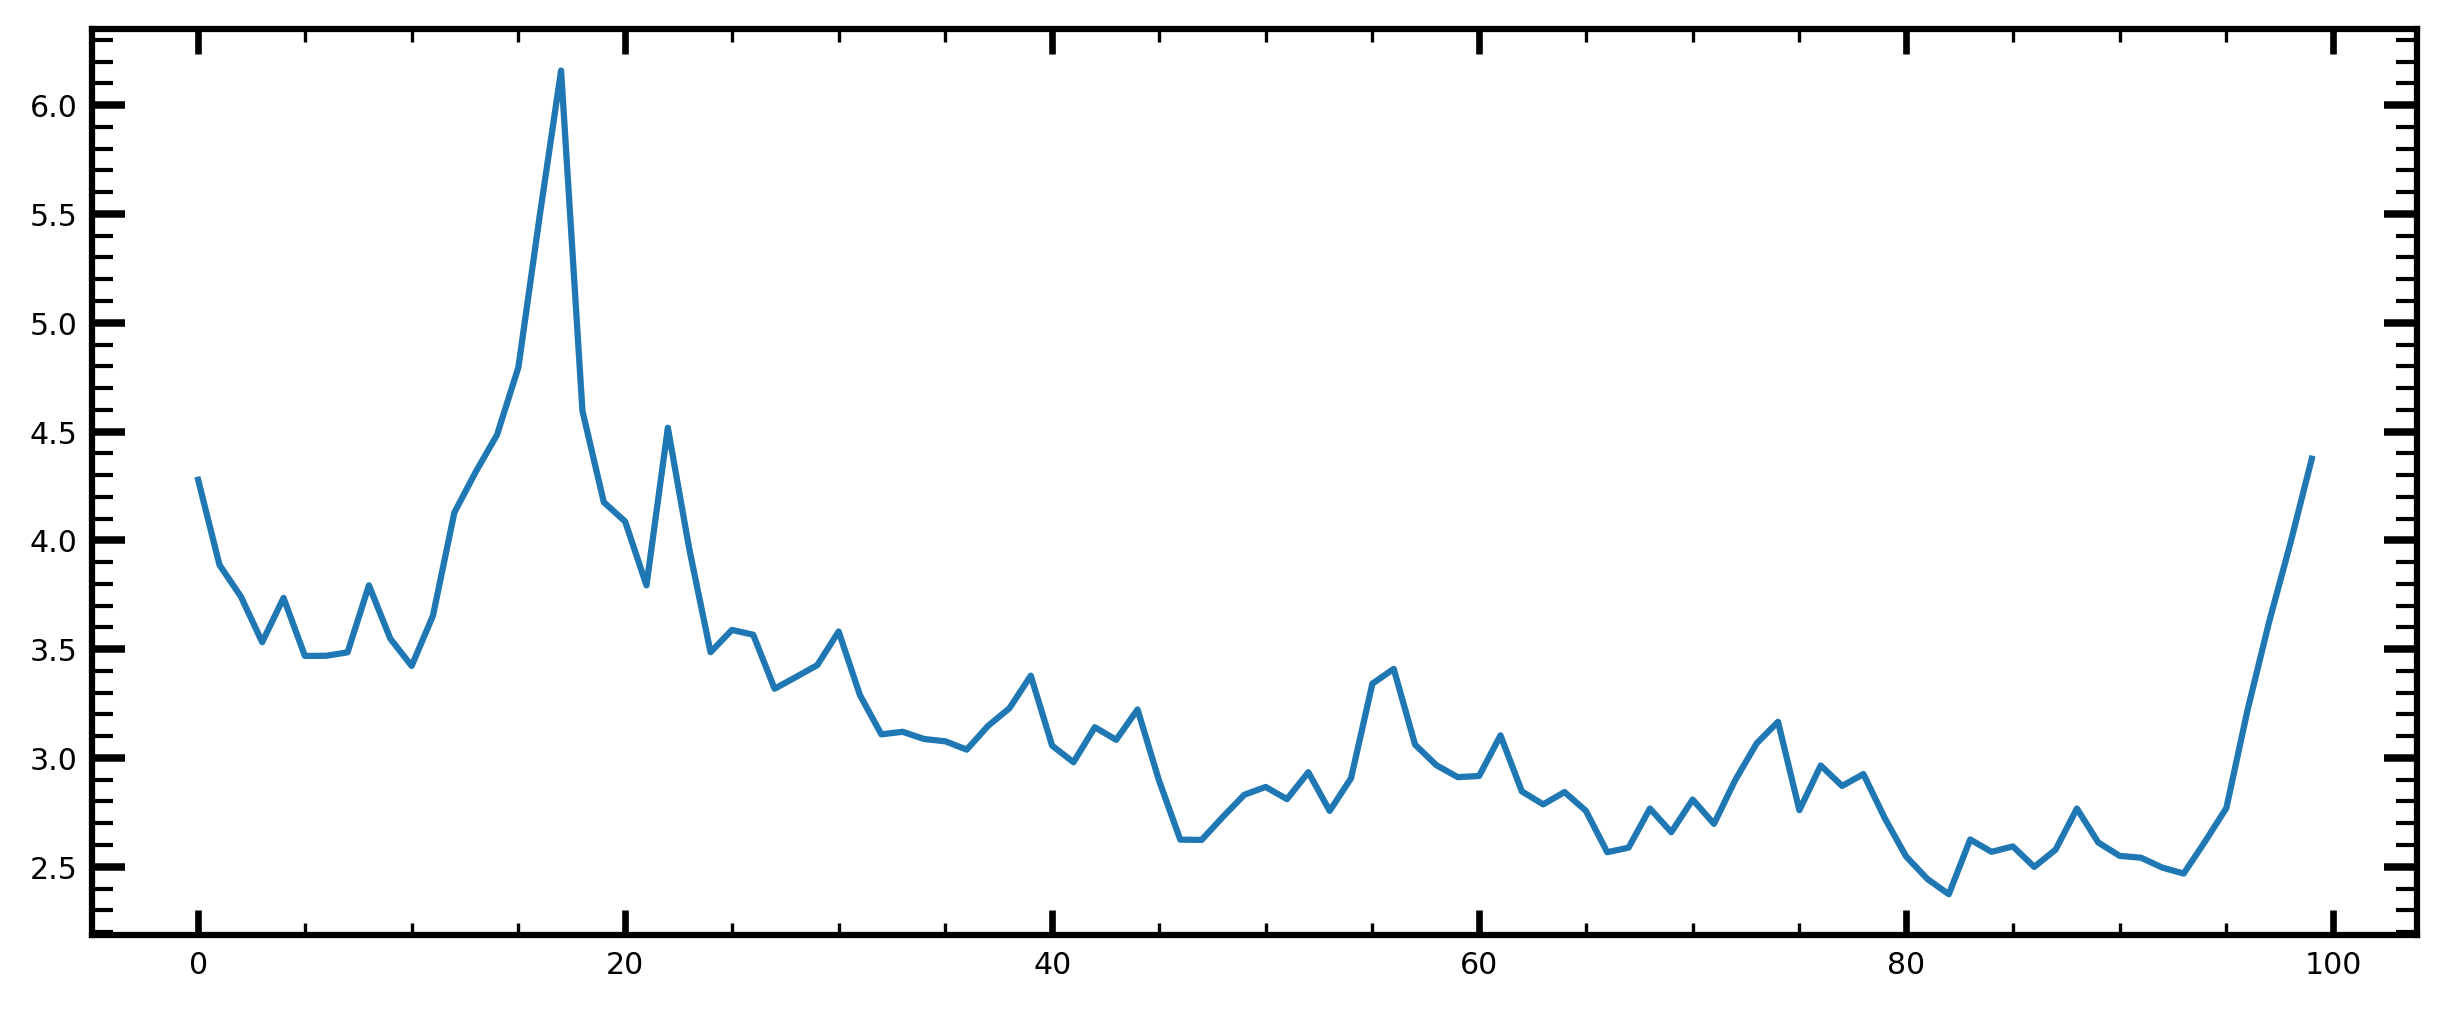

In [35]:
plt.figure(figsize=(10,4))
plt.plot(ER_curve[1000:1100])

(array([1.380000e+02, 2.840000e+03, 3.308700e+04, 2.088900e+05,
        7.027630e+05, 1.258421e+06, 1.195219e+06, 6.078680e+05,
        1.622150e+05, 2.286300e+04]),
 array([-1.45145786, -1.20631241, -0.96116696, -0.71602151, -0.47087605,
        -0.2257306 ,  0.01941485,  0.26456031,  0.50970576,  0.75485121,
         0.99999667]),
 <a list of 10 Patch objects>)

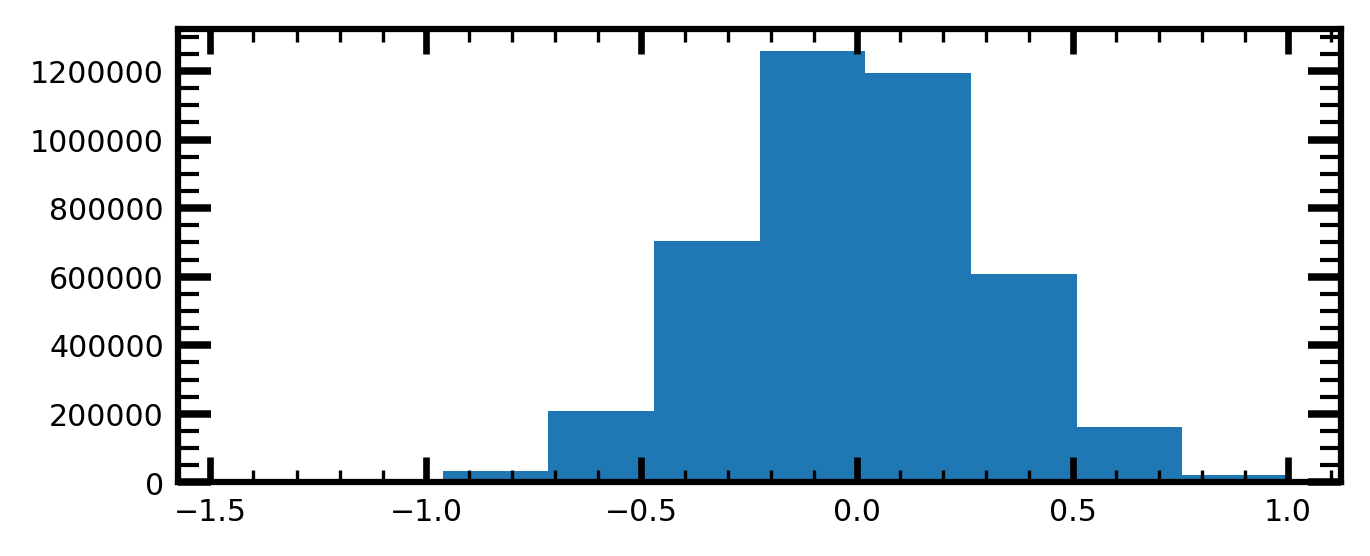

In [41]:
plt.figure(figsize=(5,2))
plt.hist(np.log10(ER_curve))

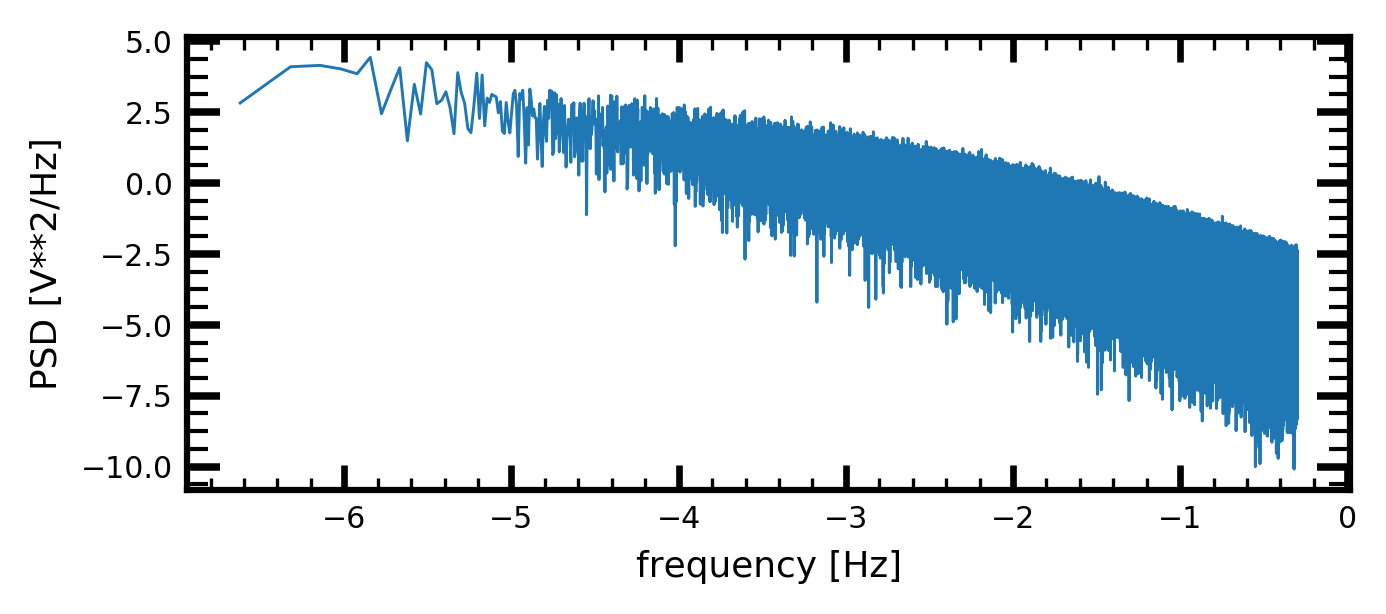

In [44]:
from scipy import signal
plt.figure(figsize=(5,2))
x=np.log10(ER_curve)
Pxx_den = signal.periodogram(x)
plt.plot(np.log10(Pxx_den[0][1:]),np.log10(Pxx_den[1][1:]),lw=0.7)

plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()